In [1]:
import os
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
## sampling data of 1 percent from the 10million data, skip the every 100th row
data=pd.read_csv('flights.csv', skiprows=lambda i: i % 100!=0)

In [39]:
data.shape

(100000, 43)

In [3]:
cols=['fl_date', 'mkt_unique_carrier', 'mkt_carrier_fl_num', 'origin_airport_id', 
       'crs_dep_time', 'crs_arr_time', 'cancelled',
'crs_elapsed_time','distance']

In [7]:
df2=data[cols]

In [5]:
df2[df2.cancelled==1]

,fl_date,mkt_unique_carrier,mkt_carrier_fl_num,origin_airport_id,crs_dep_time,crs_arr_time,cancelled,crs_elapsed_time,distance
171,2018-03-26,AA,4791,14100,835,1011,1.0,96.0,257.0
243,2018-03-27,AA,3694,10868,1556,1755,1.0,179.0,922.0
267,2018-03-27,AA,2511,11298,1255,1347,1.0,112.0,569.0
322,2018-03-27,AA,1376,11298,1255,1639,1.0,164.0,1121.0
367,2018-03-27,AA,1038,15016,1140,1335,1.0,115.0,550.0
...,...,...,...,...,...,...,...,...,...
99629,2019-05-30,WN,133,12191,605,705,1.0,60.0,302.0
99632,2019-05-30,WN,1200,12889,630,755,1.0,85.0,386.0
99834,2019-05-31,AA,1636,11057,1542,1719,1.0,217.0,1337.0
99835,2019-05-31,AA,1080,14027,502,655,1.0,113.0,590.0


In [13]:
df2[df2.cancelled==0]

,fl_date,mkt_unique_carrier,mkt_carrier_fl_num,origin_airport_id,crs_dep_time,crs_arr_time,cancelled,crs_elapsed_time,distance
0,2018-03-25,DL,2199,10397,1259,1422,0.0,203.0,1199.0
1,2018-03-25,DL,2288,12478,832,1202,0.0,390.0,2446.0
2,2018-03-25,DL,2380,13204,713,1011,0.0,178.0,1121.0
3,2018-03-25,DL,2458,12278,556,905,0.0,129.0,782.0
4,2018-03-25,DL,2546,14869,1650,1746,0.0,116.0,626.0
...,...,...,...,...,...,...,...,...,...
99995,2019-04-01,AS,2175,14747,1410,1505,0.0,55.0,129.0
99996,2019-04-01,AS,2391,10713,945,1025,0.0,100.0,399.0
99997,2019-04-01,AS,2742,14004,1400,1615,0.0,135.0,728.0
99998,2019-04-01,AA,2992,10372,1247,1635,0.0,168.0,1013.0


In [19]:
## the total cancelled flight is  about 1.6% - very imbalanced dataset
print('the total cancelled flight is ', round(1609/100000,3)) 

the total cancelled flight is  0.016


In [20]:
df2['fl_date']=pd.to_datetime(df2['fl_date'])
df2['fl_year']=df2['fl_date'].dt.year 
df2['fl_month']=df2['fl_date'].dt.month 
df2['fl_day_of_week']=df2['fl_date'].dt.weekday
df2['dep_hour']=(df2['crs_dep_time']/100).astype(int)
df2['arr_hour']=(df2['crs_arr_time']/100).astype(int)

In [21]:
df2.fillna(0, inplace=True)

In [71]:
df2.head()

,fl_date,mkt_unique_carrier,mkt_carrier_fl_num,origin_airport_id,crs_dep_time,crs_arr_time,cancelled,crs_elapsed_time,distance,fl_year,fl_month,fl_day_of_week,dep_hour,arr_hour
0,2018-03-25,DL,2199,10397,1259,1422,0.0,203.0,1199.0,2018,3,6,12,14
1,2018-03-25,DL,2288,12478,832,1202,0.0,390.0,2446.0,2018,3,6,8,12
2,2018-03-25,DL,2380,13204,713,1011,0.0,178.0,1121.0,2018,3,6,7,10
3,2018-03-25,DL,2458,12278,556,905,0.0,129.0,782.0,2018,3,6,5,9
4,2018-03-25,DL,2546,14869,1650,1746,0.0,116.0,626.0,2018,3,6,16,17


In [22]:
df3=df2[['mkt_unique_carrier','mkt_carrier_fl_num','origin_airport_id',	 'distance','fl_month','fl_day_of_week','dep_hour',	'arr_hour','cancelled']]

In [23]:
# label encode the categorical data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score 
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV


encoder=LabelEncoder()
scaler=StandardScaler()
smote=SMOTE()


In [24]:
X=df3.iloc[:,:-1]
y=df3['cancelled'].values

In [25]:
col_encoder=['mkt_unique_carrier', 'mkt_carrier_fl_num', 'origin_airport_id',
       'fl_month', 'fl_day_of_week', 'dep_hour', 'arr_hour']

In [26]:
X

,mkt_unique_carrier,mkt_carrier_fl_num,origin_airport_id,distance,fl_month,fl_day_of_week,dep_hour,arr_hour
0,DL,2199,10397,1199.0,3,6,12,14
1,DL,2288,12478,2446.0,3,6,8,12
2,DL,2380,13204,1121.0,3,6,7,10
3,DL,2458,12278,782.0,3,6,5,9
4,DL,2546,14869,626.0,3,6,16,17
...,...,...,...,...,...,...,...,...
99995,AS,2175,14747,129.0,4,0,14,15
99996,AS,2391,10713,399.0,4,0,9,10
99997,AS,2742,14004,728.0,4,0,14,16
99998,AA,2992,10372,1013.0,4,0,12,16


In [27]:
X[col_encoder]=X[col_encoder].apply(encoder.fit_transform)

In [28]:
X=scaler.fit_transform(X)

## Modeling

In [29]:
# split the dataset as train and split wiht the test size=30%
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.30)

In [30]:
# Apply SMOTE to training set only
X_resampled, y_resampled=smote.fit_resample(X_train, y_train)

### SVM modeling 

In [29]:
# apply SVM modeling
svc=SVC(kernel='rbf', random_state=0)
svc.fit(X_resampled, y_resampled)
y_svc=svc.predict(X_test)
cm=metrics.confusion_matrix(y_test,y_svc)
print(cm)

[[20686  8845]
 [  218   251]]


In [39]:
print(metrics.accuracy_score(y_test,y_svc))

0.6979


In [36]:
print(f'the SVC Modeling has the precision score of {round(metrics.precision_score(y_test,y_svc),2)} and recall score {round(metrics.recall_score(y_test,y_svc),2)}')

the SVC Modeling has the precision score of 0.03 and recall score 0.54


In [164]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
random=RandomForestClassifier(n_estimators=10, criterion='entropy')
random.fit(X_train, y_train)
y_random=random.predict(X_test)
cm=metrics.confusion_matrix(y_test,y_random)
print(cm)

[[29467    18]
 [  513     2]]


In [165]:
print('the precision scores', metrics.precision_score(y_test, y_random))
print('the recall scores', metrics.recall_score(y_test, y_random))
print('the accuracy score: ', metrics.accuracy_score(y_test, y_random))

the precision scores 0.1
the recall scores 0.003883495145631068
the accuracy score:  0.9823


### Logistic Regression

In [60]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_resampled, y_resampled)
y_log=logreg.predict(X_test)
cm=metrics.confusion_matrix(y_test,y_log)
print(cm)
print('the precision scores', metrics.precision_score(y_test, y_log))
print('the recall scores', metrics.recall_score(y_test, y_log))
print('the accuracy score: ', metrics.accuracy_score(y_test, y_log))


[[17697 11834]
 [  184   285]]
the precision scores 0.02351679181450615
the recall scores 0.6076759061833689
the accuracy score:  0.5994


In [57]:
#probs=logreg.predict_proba(X_test)
#print(metrics.roc_auc_score(y_test, probs[:,1]))


0.6499430073807013


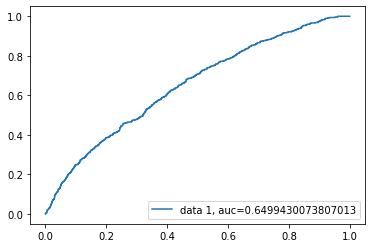

In [62]:
# Plot the ROC Curve
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Text(0.5, 257.44, 'Predicted label')

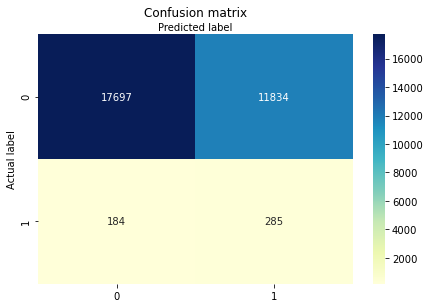

In [47]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
#create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(criterion='entropy', random_state=0)
tree.fit(X_resampled, y_resampled)
y_tree=tree.predict(X_test)
print('the recall scores', metrics.recall_score(y_test, y_tree))
cm=metrics.confusion_matrix(y_test,y_tree)
print(cm)
print('the precision scores', metrics.precision_score(y_test, y_tree))
print('the recall scores', metrics.recall_score(y_test, y_tree))
print('the accuracy score: ', metrics.accuracy_score(y_test, y_tree))


the recall scores 0.05970149253731343
[[28736   795]
 [  441    28]]
the precision scores 0.03402187120291616
the recall scores 0.05970149253731343
the accuracy score:  0.9588


### RandomForest 

In [43]:
from sklearn.ensemble import RandomForestClassifier
random=RandomForestClassifier(n_estimators=10, criterion='entropy')
random.fit(X_resampled, y_resampled)
y_random=random.predict(X_test)
cm=metrics.confusion_matrix(y_test,y_random)
print(cm)
print('the precision scores', metrics.precision_score(y_test, y_random))
print('the recall scores', metrics.recall_score(y_test, y_random))
print('the accuracy score: ', metrics.accuracy_score(y_test, y_random))

[[29465    66]
 [  463     6]]
the precision scores 0.08333333333333333
the recall scores 0.01279317697228145
the accuracy score:  0.9823666666666667


Text(0.5, 257.44, 'Predicted label')

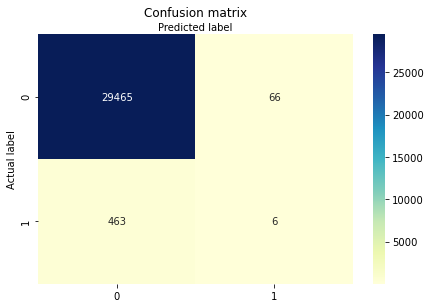

In [44]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
#create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [51]:
from imblearn.pipeline import Pipeline
resampling=SMOTE()
model=SVC()
pipeline=Pipeline([('SMOTE', resampling), ('SVC', model)])
pipeline.fit(X_train, y_train)
y_pred=pipeline.predict(X_test)
print('Classification_report', metrics.classification_report(y_test, y_pred))

Classification_report               precision    recall  f1-score   support

         0.0       0.99      0.70      0.82     29531
         1.0       0.03      0.54      0.05       469

    accuracy                           0.70     30000
   macro avg       0.51      0.62      0.44     30000
weighted avg       0.97      0.70      0.81     30000



#### the SVC has generate the modeling giving the best precision score, however failed to predict the most of the cancelled flights 

### Applying ensemble modeling


In [35]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

# Define the three classifiers to use in the ensemble
clf1 = LogisticRegression(class_weight={0:1, 1:15}, random_state=5)
clf2 = RandomForestClassifier(class_weight={0:1, 1:12}, criterion='gini', max_depth=8, max_features='log2',
            min_samples_leaf=10, n_estimators=30, n_jobs=-1, random_state=5)
clf3 = GaussianNB()

# Combine the classifiers in the ensemble model
ensemble_model =VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
ensemble_model.fit(X_resampled,y_resampled)
y_enseble=ensemble_model.predict(X_test)
print('Classification_report', metrics.classification_report(y_test, y_enseble))
print('the pre')




Classification_report               precision    recall  f1-score   support

         0.0       0.99      0.14      0.25     29491
         1.0       0.02      0.94      0.04       509

    accuracy                           0.16     30000
   macro avg       0.51      0.54      0.14     30000
weighted avg       0.98      0.16      0.25     30000



In [36]:
cm=metrics.confusion_matrix(y_test,y_enseble)
print(cm)
print('the precision scores', metrics.precision_score(y_test, y_enseble))
print('the recall scores', metrics.recall_score(y_test, y_enseble))
print('the accuracy score: ', metrics.accuracy_score(y_test, y_enseble))

[[ 4245 25246]
 [   28   481]]
the precision scores 0.01869631126831733
the recall scores 0.9449901768172888
the accuracy score:  0.15753333333333333


Text(0.5, 257.44, 'Predicted label')

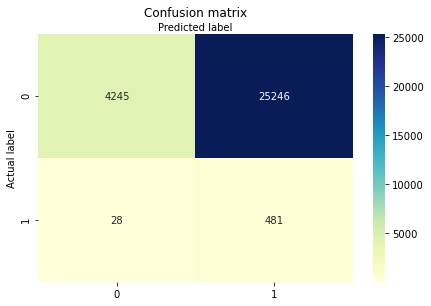

In [37]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
#create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## The ensemble give the best recall score, however the worst precision score.But it has predicted among total 510 cancelled flgihts, 481 have been predicted correct. 